In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('updated_table.csv')

In [4]:
# df.drop(['updated_at', 'id', 'player_id'], axis=1, inplace=True)
column_rename = {
    'games': 'G',
    'pos': 'POS',
    'points': 'PTS',
    'rebounds': 'TRB',
    'assists': 'AST',
    'steals': 'STL',
    'blocks': 'BLK',
    'turnovers': 'TOV',
    'fg_percentage': 'FG%',
    'three_point_percentage': '3P%',
    'free_throw_percentage': 'FT%',
    'minutes': 'MP',
    'case_name': 'case_name'
}

df = df.rename(columns=column_rename)
df.head()

,id,player_id,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,updated_at,MP,case_name
0,44,66,1515,3,27.1,7.5,7.4,1.5,0.7,3.5,0.506,0.348,0.736,2024-12-08 21:03:02,NaN,LeBron James
1,45,67,1346,2,25.0,5.2,4.7,1.4,0.5,3.0,0.447,0.329,0.837,2024-12-08 21:03:02,NaN,Kobe Bryant
2,46,68,1072,2,30.1,6.2,5.3,2.3,0.8,2.7,0.497,0.327,0.835,2024-12-07 22:07:56,NaN,Michael Jordan
3,48,69,1207,5,23.7,10.9,2.5,0.6,2.3,2.7,0.582,0.045,0.527,2024-12-08 21:03:02,NaN,Shaquille O'Neal
4,49,72,861,1,25.1,4.2,6.7,1.0,0.3,2.8,0.438,0.371,0.898,2024-12-07 22:07:56,NaN,Damian Lillard


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          143 non-null    int64  
 1   player_id   143 non-null    int64  
 2   G           143 non-null    int64  
 3   POS         143 non-null    int64  
 4   PTS         143 non-null    float64
 5   TRB         143 non-null    float64
 6   AST         143 non-null    float64
 7   STL         143 non-null    float64
 8   BLK         143 non-null    float64
 9   TOV         143 non-null    float64
 10  FG%         143 non-null    float64
 11  3P%         143 non-null    float64
 12  FT%         143 non-null    float64
 13  updated_at  143 non-null    object 
 14  MP          23 non-null     float64
 15  case_name   143 non-null    object 
dtypes: float64(10), int64(4), object(2)
memory usage: 18.0+ KB


C:\Users\zohai\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


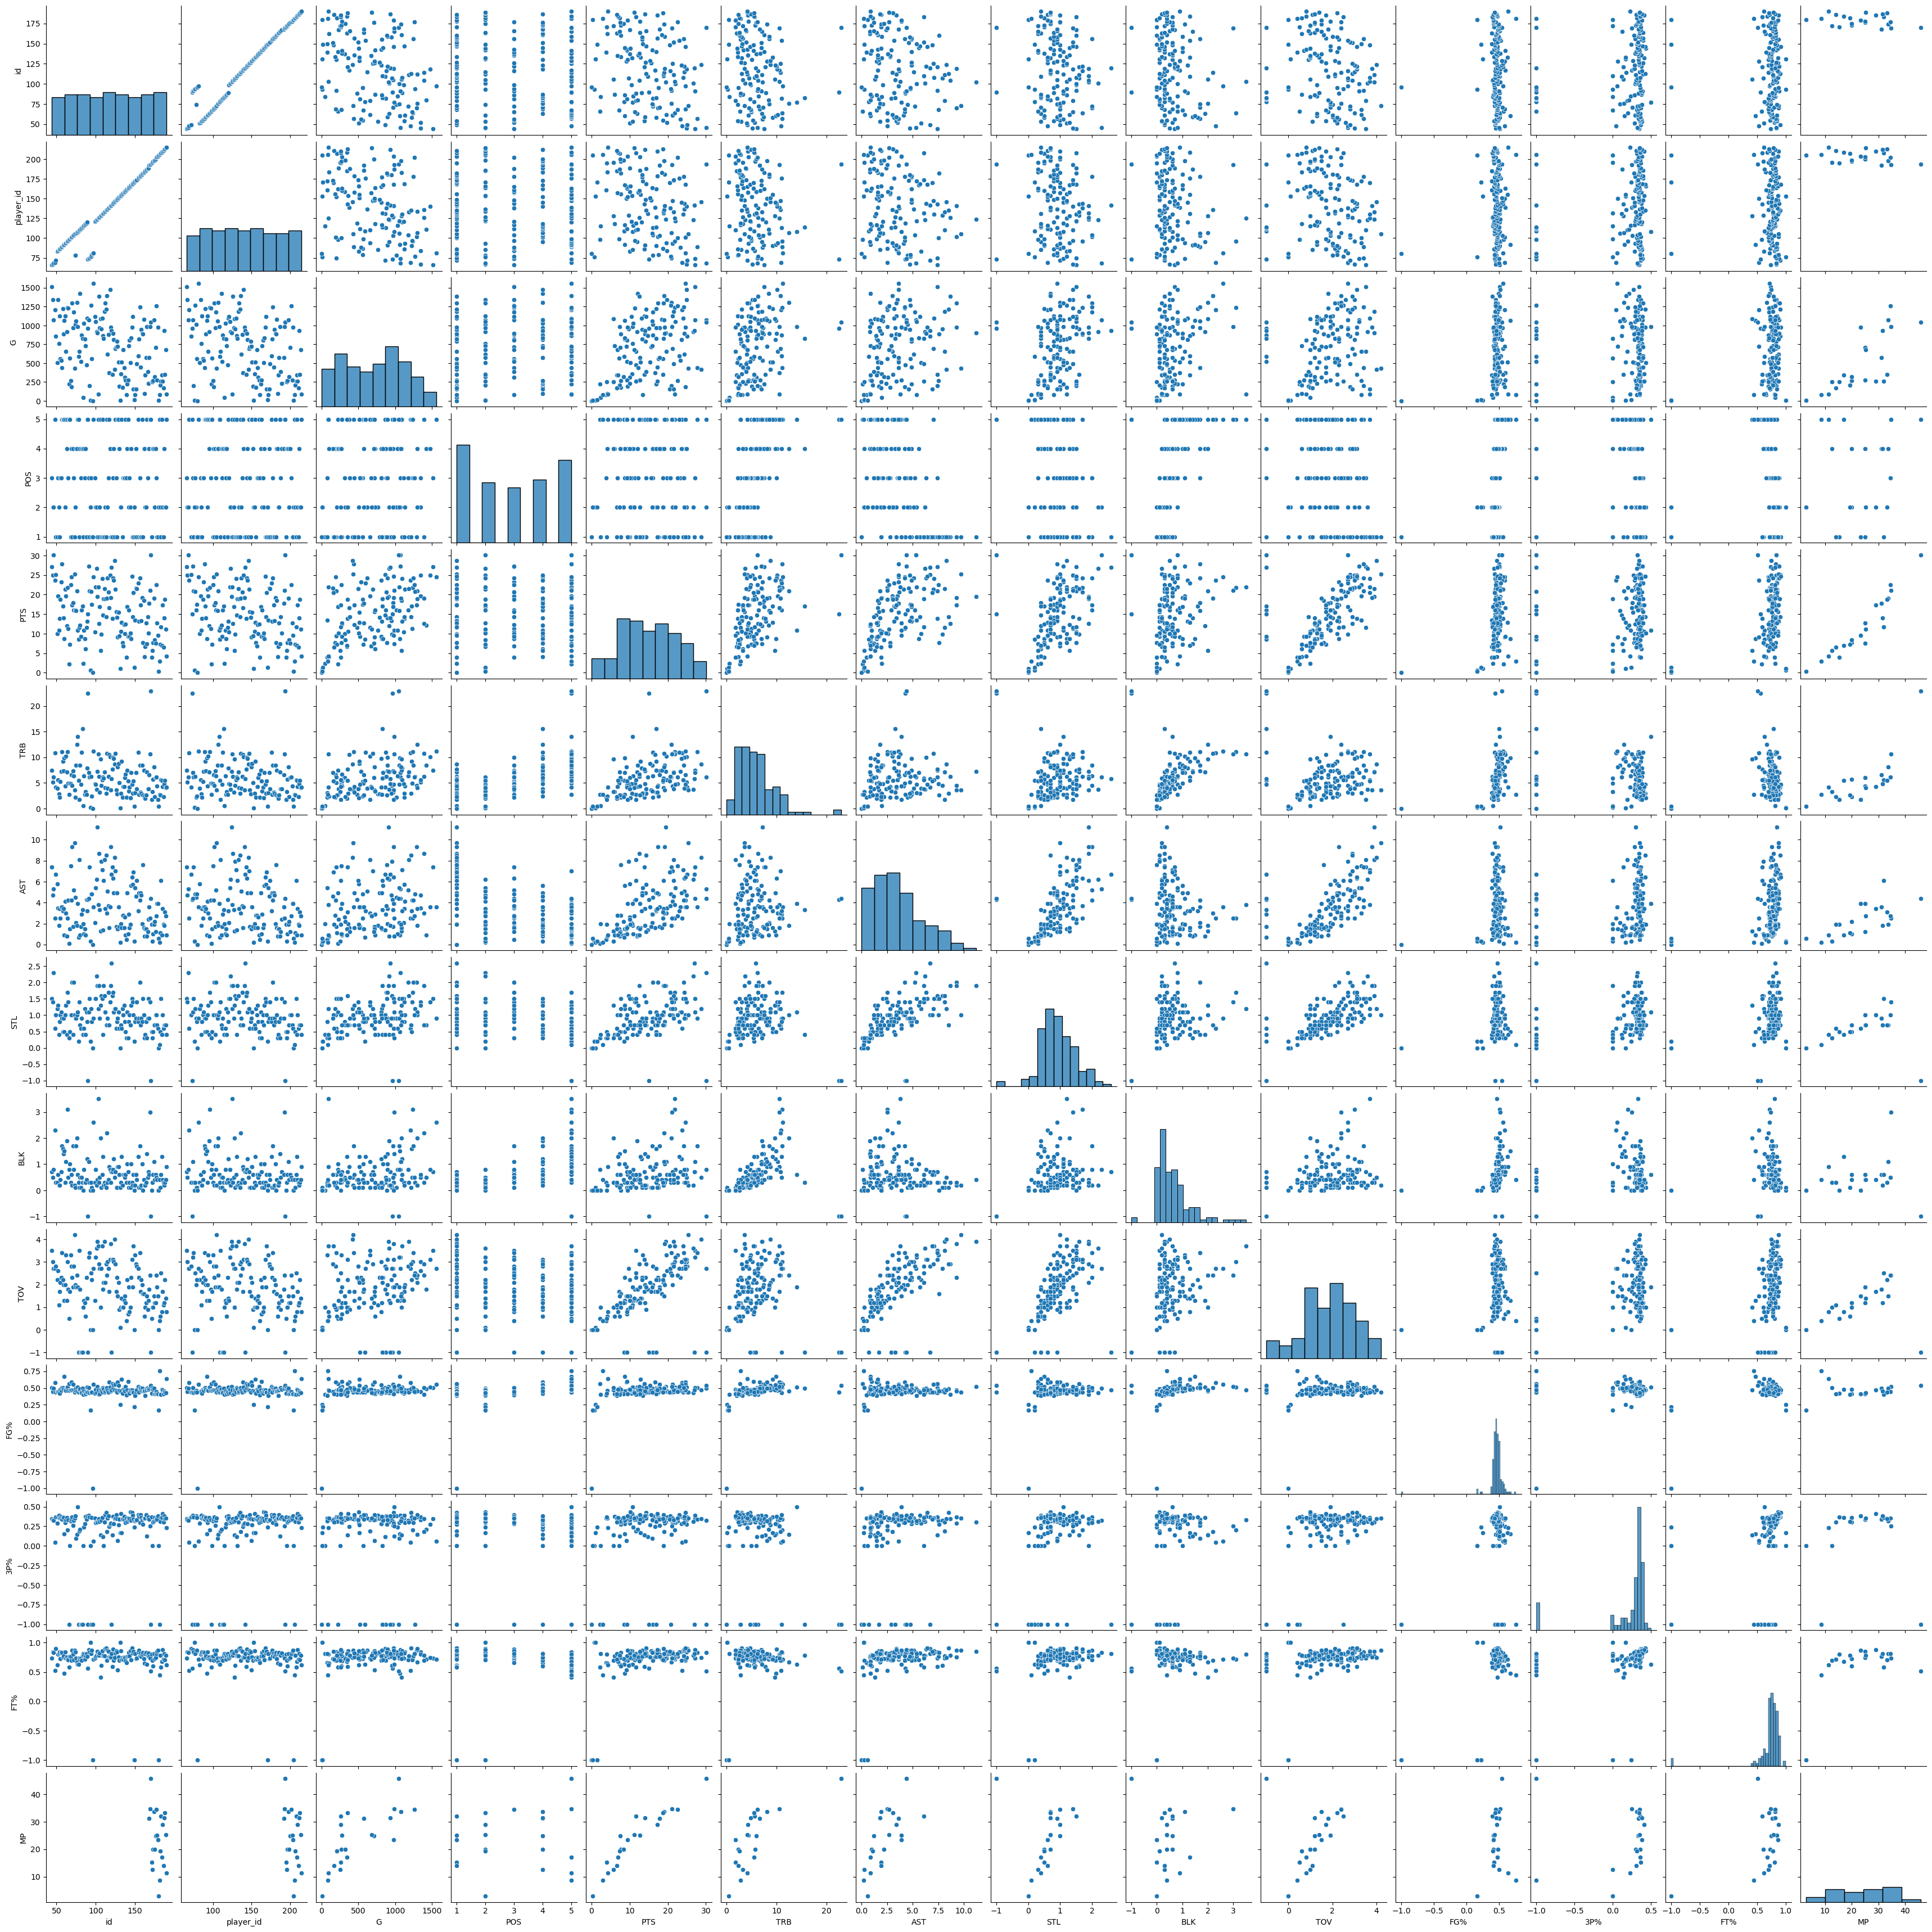

In [11]:
sns.pairplot(df)

In [12]:
df.describe()

,id,player_id,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,MP
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,23.000000
mean,117.839161,140.524476,711.517483,2.923077,14.980420,5.874126,3.574126,0.937762,0.634266,1.861538,0.458140,0.202406,0.723434,23.695652
std,42.256036,42.638644,406.955804,1.538597,7.152752,3.637592,2.425327,0.551030,0.673242,1.168418,0.142553,0.362344,0.271477,10.299447
min,44.000000,66.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.900000
25%,81.500000,104.500000,346.500000,1.000000,9.450000,3.250000,1.600000,0.600000,0.200000,1.150000,0.436000,0.244000,0.712000,16.150000
50%,118.000000,140.000000,730.000000,3.000000,14.300000,5.400000,3.200000,0.900000,0.400000,1.900000,0.463000,0.332000,0.767000,24.900000
75%,154.500000,176.500000,1037.500000,4.000000,20.900000,7.500000,4.900000,1.300000,0.800000,2.700000,0.499500,0.361000,0.826500,31.750000
max,190.000000,215.000000,1560.000000,5.000000,30.100000,22.900000,11.200000,2.600000,3.500000,4.200000,0.758000,0.500000,1.000000,45.800000


<Axes: >

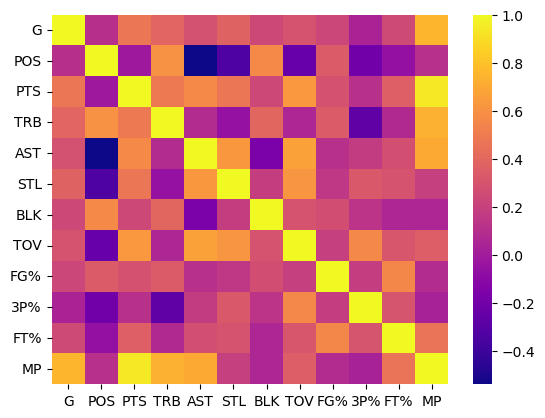

In [10]:
corr = df.drop(['case_name'],axis=1).corr()
sns.heatmap(corr, cmap='plasma')

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

case_name_col = df['case_name']

cdf = df.drop(['case_name', 'MP'], axis=1)

# cdf['AST'] = cdf['AST'] * 1.4
# cdf['TRB'] = cdf['TRB'] * 1.2

# cdf['FG%'] = cdf['FG%'] * 1.75
# cdf['3P%'] = cdf['3P%'] * 1.75
# cdf['FT%'] = cdf['FT%'] * 1.25

# cdf['TOV'] = cdf['TOV'] * 0.5

scaler = StandardScaler()
df_scaled = scaler.fit_transform(cdf)

kmeans = KMeans(n_clusters=5)

cdf['case_name'] = case_name_col
cdf['cluster'] = kmeans.fit_predict(df_scaled)


sns.scatterplot(data=cdf, x='PTS', y='AST', hue='cluster', palette='deep')

ValueError: could not convert string to float: '2024-12-08 21:03:02'

In [17]:
cdf.head()

,id,player_id,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,updated_at
0,44,66,1515,3,27.1,7.5,7.4,1.5,0.7,3.5,0.506,0.348,0.736,2024-12-08 21:03:02
1,45,67,1346,2,25.0,5.2,4.7,1.4,0.5,3.0,0.447,0.329,0.837,2024-12-08 21:03:02
2,46,68,1072,2,30.1,6.2,5.3,2.3,0.8,2.7,0.497,0.327,0.835,2024-12-07 22:07:56
3,48,69,1207,5,23.7,10.9,2.5,0.6,2.3,2.7,0.582,0.045,0.527,2024-12-08 21:03:02
4,49,72,861,1,25.1,4.2,6.7,1.0,0.3,2.8,0.438,0.371,0.898,2024-12-07 22:07:56


In [16]:
cdf[cdf['cluster']==0].head(3)

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,case_name,cluster
3,1207,5,23.7,10.9,2.5,0.6,2.3,2.7,0.582,0.045,0.527,Shaquille O'Neal,0
10,536,3,23.3,7.2,3.6,1.1,0.7,2.3,0.460,0.375,0.841,Jayson Tatum,0
11,437,5,27.8,11.1,3.6,0.9,1.7,3.4,0.503,0.339,0.827,Joel Embiid,0


In [25]:
cdf[cdf['cluster']==1]

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,case_name,cluster
20,224,5,2.2,2.7,0.1,0.3,0.8,0.5,0.567,-1.0,0.578,Hasheem Thabeet,1
32,590,5,8.5,5.5,0.7,0.2,0.3,-1.0,0.434,-1.0,0.630,Walt Wesley,1
35,522,3,9.3,4.7,1.7,0.6,0.1,-1.0,0.438,-1.0,0.732,Dave Stallworth,1
36,875,4,16.1,11.0,2.9,0.9,0.5,-1.0,0.432,-1.0,0.699,Dave DeBusschere,1
37,829,4,17.0,15.6,3.3,0.4,0.3,-1.0,0.499,-1.0,0.783,Jerry Lucas,1
44,963,5,15.1,22.5,4.3,-1.0,-1.0,-1.0,0.440,-1.0,0.561,Bill Russell,1
122,1045,5,30.1,22.9,4.4,-1.0,-1.0,-1.0,0.540,-1.0,0.511,Wilt Chamberlain,1
133,84,5,3.0,2.8,0.2,0.1,0.4,0.4,0.758,-1.0,0.444,Udoka Azubuike,1


In [26]:
cdf[cdf['cluster']==2]

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,case_name,cluster
7,762,2,10.8,2.9,1.8,0.4,0.2,1.1,0.450,0.386,0.825,Arron Afflalo,2
9,559,3,18.8,5.3,2.5,1.0,0.4,2.1,0.479,0.363,0.722,Jaylen Brown,2
21,567,5,7.2,4.9,1.5,0.5,1.0,1.7,0.462,0.000,0.760,Luc Longley,2
38,44,1,2.4,0.6,2.0,0.4,0.0,1.0,0.404,0.000,0.810,Billy Donovan,2
39,1030,4,10.9,6.4,1.0,0.6,0.8,1.3,0.455,0.238,0.790,Joe Smith,2
40,819,3,8.7,2.8,1.5,1.2,0.3,1.2,0.425,0.284,0.713,Corey Brewer,2
41,730,4,6.1,3.3,0.9,0.4,0.3,0.6,0.414,0.373,0.771,Anthony Tolliver,2
47,6,2,0.7,0.2,0.3,0.2,0.0,0.0,0.167,0.000,1.000,Bronny James,2
52,1118,3,10.4,4.8,2.1,1.5,0.3,1.3,0.422,0.351,0.731,Trevor Ariza,2
79,719,3,15.6,3.6,1.7,0.6,0.1,1.7,0.460,0.394,0.859,Bojan Bogdanović,2


In [27]:
cdf[cdf['cluster']==3]

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,case_name,cluster
50,1,1,0.0,0.0,0.0,0.0,0.0,0.0,-1.000,-1.00,-1.0,JamesOn Curry,3
102,13,2,1.4,0.5,0.3,0.2,0.0,0.0,0.222,0.24,-1.0,Adam Flagler,3
132,7,2,0.3,0.4,0.6,0.0,0.0,0.0,0.167,0.00,-1.0,Joel Ayayi,3


In [28]:
cdf[cdf['cluster']==4]

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,case_name,cluster
0,1515,3,27.1,7.5,7.4,1.5,0.7,3.5,0.506,0.348,0.736,LeBron James,4
1,1346,2,25.0,5.2,4.7,1.4,0.5,3.0,0.447,0.329,0.837,Kobe Bryant,4
2,1072,2,30.1,6.2,5.3,2.3,0.8,2.7,0.497,0.327,0.835,Michael Jordan,4
4,861,1,25.1,4.2,6.7,1.0,0.3,2.8,0.438,0.371,0.898,Damian Lillard,4
5,507,1,10.0,4.0,5.8,1.2,0.3,2.2,0.448,0.287,0.623,Elfrid Payton,4
6,1343,3,19.7,5.6,3.5,1.3,0.6,2.6,0.445,0.368,0.806,Paul Pierce,4
8,1123,1,13.9,2.2,3.4,0.8,0.2,1.7,0.419,0.351,0.842,Lou Williams,4
15,1129,2,21.3,4.4,4.1,1.0,0.3,2.0,0.469,0.296,0.841,DeMar DeRozan,4
19,1231,3,11.3,4.9,4.2,1.4,0.5,1.8,0.463,0.330,0.709,Andre Iguodala,4
22,271,1,22.5,4.8,7.5,1.0,0.3,3.3,0.471,0.317,0.760,Ja Morant,4


In [31]:
cdf[cdf['case_name']=='LeBron James']['cluster'].values[0]

0

In [29]:
cdf

,G,POS,PTS,TRB,AST,STL,BLK,TOV,FG%,3P%,FT%,case_name,cluster
0,1515,3,27.1,7.5,7.4,1.5,0.7,3.5,0.506,0.348,0.736,LeBron James,4
1,1346,2,25.0,5.2,4.7,1.4,0.5,3.0,0.447,0.329,0.837,Kobe Bryant,4
2,1072,2,30.1,6.2,5.3,2.3,0.8,2.7,0.497,0.327,0.835,Michael Jordan,4
3,1207,5,23.7,10.9,2.5,0.6,2.3,2.7,0.582,0.045,0.527,Shaquille O'Neal,0
4,861,1,25.1,4.2,6.7,1.0,0.3,2.8,0.438,0.371,0.898,Damian Lillard,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,172,1,6.6,2.3,1.9,0.6,0.3,1.1,0.412,0.306,0.715,Dalano Banton,2
139,936,4,14.0,4.8,1.8,0.7,0.2,1.2,0.457,0.381,0.810,Harrison Barnes,2
140,352,2,18.8,5.5,3.1,0.7,0.3,2.2,0.437,0.346,0.711,RJ Barrett,2
141,679,2,11.2,4.1,2.7,0.7,0.4,1.4,0.430,0.355,0.787,Will Barton,2
